In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [217]:
df = pd.read_csv("adult_with_nan_except_income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,NaN,NaN,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,NaN,Married-civ-spouse,Protective-serv,Husband,White,NaN,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,NaN,?,103497.0,NaN,10.0,Never-married,?,Own-child,White,NaN,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,NaN,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,NaN,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,NaN,NaN,Adm-clerical,Unmarried,White,Female,0.0,0.0,NaN,United-States,<=50K
48840,22.0,Private,201490.0,NaN,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [218]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,46707.000000,4.482200e+04,44170.000000,44829.000000,45092.000000,44580.000000
mean,38.637485,1.897457e+05,10.080371,1067.445716,87.981859,40.404845
std,13.721635,1.052755e+05,2.566178,7393.608256,403.990449,12.383400
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176758e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783485e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.378608e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              46707 non-null  float64
 1   workclass        47539 non-null  object 
 2   fnlwgt           44822 non-null  float64
 3   education        46444 non-null  object 
 4   educational-num  44170 non-null  float64
 5   marital-status   47029 non-null  object 
 6   occupation       45083 non-null  object 
 7   relationship     47690 non-null  object 
 8   race             46112 non-null  object 
 9   gender           45606 non-null  object 
 10  capital-gain     44829 non-null  float64
 11  capital-loss     45092 non-null  float64
 12  hours-per-week   44580 non-null  float64
 13  native-country   48001 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [220]:
cor_data = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
cor_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.064532,0.028188,0.005424,0.002017,0.064778,-0.011602,-0.006334,-0.020992,-0.015777,0.045880,0.024006,0.044258,-0.002397,0.034845
workclass,0.064532,1.000000,-0.009815,0.047880,0.060098,0.019585,-0.050987,-0.023721,-0.003134,-0.052656,0.023642,0.016355,0.059242,-0.008585,0.113370
fnlwgt,0.028188,-0.009815,1.000000,-0.010890,-0.011404,0.025917,-0.009155,0.034542,0.039433,0.070075,0.016629,0.002487,0.012023,-0.002994,-0.057053
education,0.005424,0.047880,-0.010890,1.000000,0.631834,-0.008313,-0.012976,0.019531,0.003698,-0.021012,0.020042,0.012530,0.001109,0.067984,0.151881
educational-num,0.002017,0.060098,-0.011404,0.631834,1.000000,-0.000433,-0.016617,0.019654,0.005423,-0.020100,0.029073,0.011619,0.012676,0.060211,0.141492
marital-status,0.064778,0.019585,0.025917,-0.008313,-0.000433,1.000000,-0.009134,0.245225,0.014843,0.110718,0.038091,0.024051,-0.010549,0.012343,-0.004564
occupation,-0.011602,-0.050987,-0.009155,-0.012976,-0.016617,-0.009134,1.000000,-0.018623,-0.020145,-0.028006,-0.008229,0.008413,0.005622,-0.022643,0.056666
relationship,-0.006334,-0.023721,0.034542,0.019531,0.019654,0.245225,-0.018623,1.000000,0.069976,0.287229,0.033087,0.012027,-0.028997,0.055146,-0.056197
race,-0.020992,-0.003134,0.039433,0.003698,0.005423,0.014843,-0.020145,0.069976,1.000000,0.049640,-0.007644,-0.009013,-0.031292,0.178172,-0.055004
gender,-0.015777,-0.052656,0.070075,-0.021012,-0.020100,0.110718,-0.028006,0.287229,0.049640,1.000000,-0.003975,-0.004104,0.013634,0.007043,-0.163708


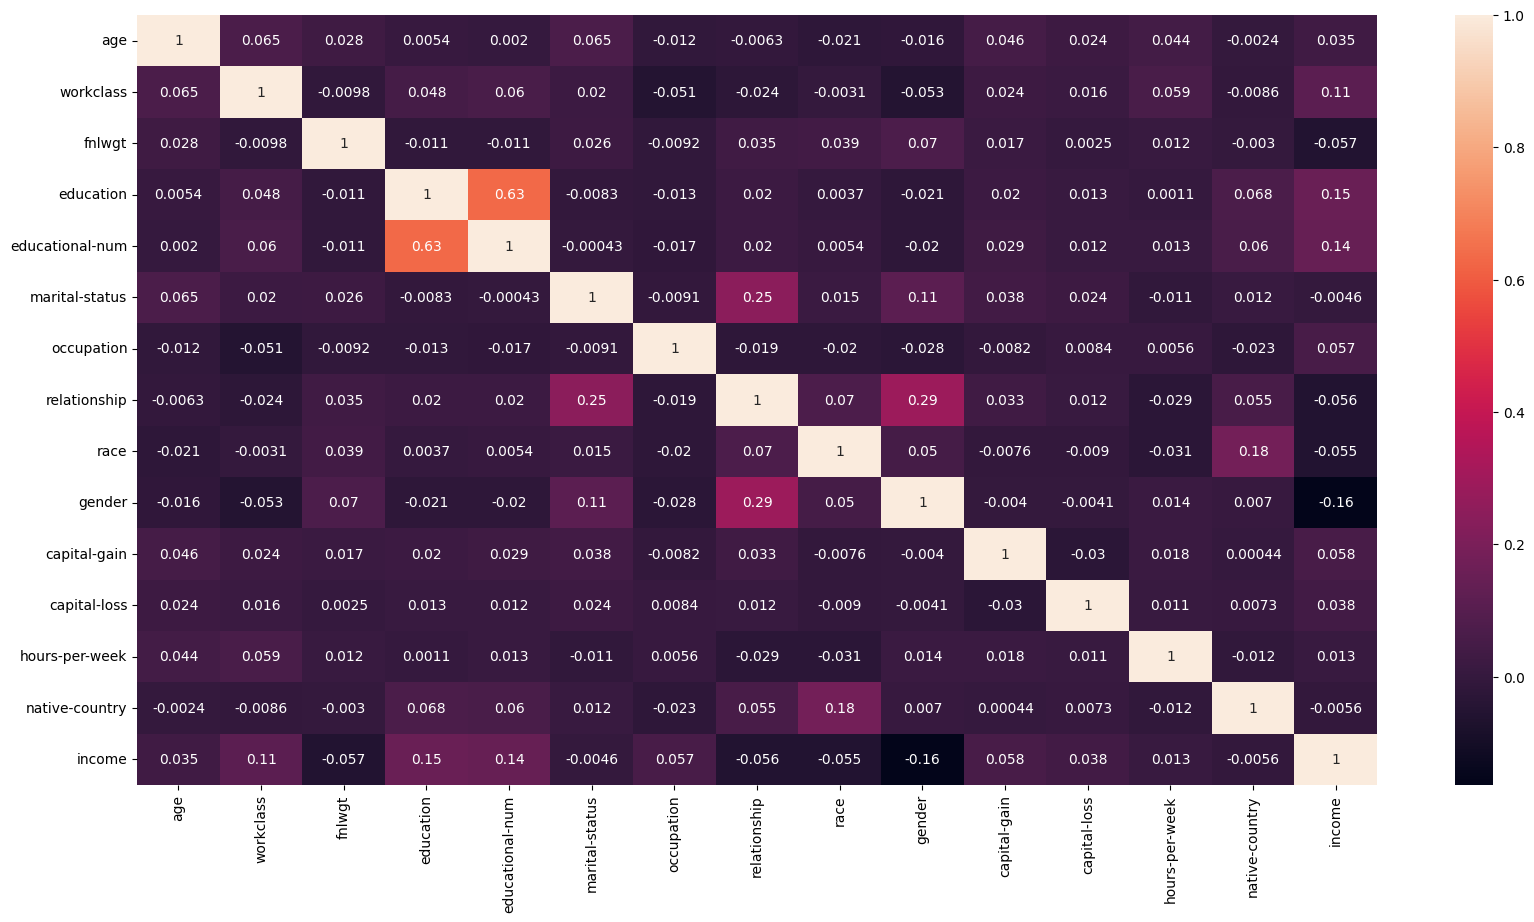

In [221]:
sns.heatmap(cor_data, annot = True)

plt.rcParams['figure.figsize'] = (20, 10)

plt.show()

**Identifying features with missing values**

In [222]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
# printing the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

age 0.0437  % missing values
workclass 0.0267  % missing values
fnlwgt 0.0823  % missing values
education 0.0491  % missing values
educational-num 0.0957  % missing values
marital-status 0.0371  % missing values
occupation 0.077  % missing values
relationship 0.0236  % missing values
race 0.0559  % missing values
gender 0.0663  % missing values
capital-gain 0.0822  % missing values
capital-loss 0.0768  % missing values
hours-per-week 0.0873  % missing values
native-country 0.0172  % missing values


### **Identifying features with numerical values**

After identifying features with numarical values we will identify which one has Discrete values and which one has Continuous values

In [223]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  6


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25.0,226802.0,7.0,0.0,0.0,40.0
1,38.0,89814.0,9.0,0.0,0.0,50.0
2,28.0,336951.0,NaN,0.0,0.0,40.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0
4,NaN,103497.0,10.0,0.0,0.0,30.0


In [224]:
df.nunique()

age                   74
workclass              9
fnlwgt             26985
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         122
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

**Identifying discrete values**

After identifying discrete values we will visualize it to get a better understanding from it.

In [225]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
print(f"Discrete Variables Count: {len(discrete_feature)}")
discrete_feature

Discrete Variables Count: 1


['educational-num']

In [226]:
discrete_feature

['educational-num']

In [227]:
data = df.copy()

# Group by 'educational-num' and 'income', and count the number of entries 
# Convert the multi-index series into a DataFrame, where income categories ('>50K' and '<=50K') become separate columns.
grouped_data = data.groupby(['educational-num', 'income']).size().unstack()

grouped_data

income,<=50K,>50K
educational-num,,
1.0,68,1
2.0,215,6
3.0,431,25
4.0,811,57
5.0,646,32
6.0,1161,75
7.0,1568,86
8.0,556,43
9.0,12009,2276


In the above code we got only one column with discrete values, then grouped it based on it's own category and income category.

From the visualyzation we can see that people with 9.0 Educational number or level has more number of people with below 50k income and
people with 13.00 Educational number or level has more number of people with above 50k

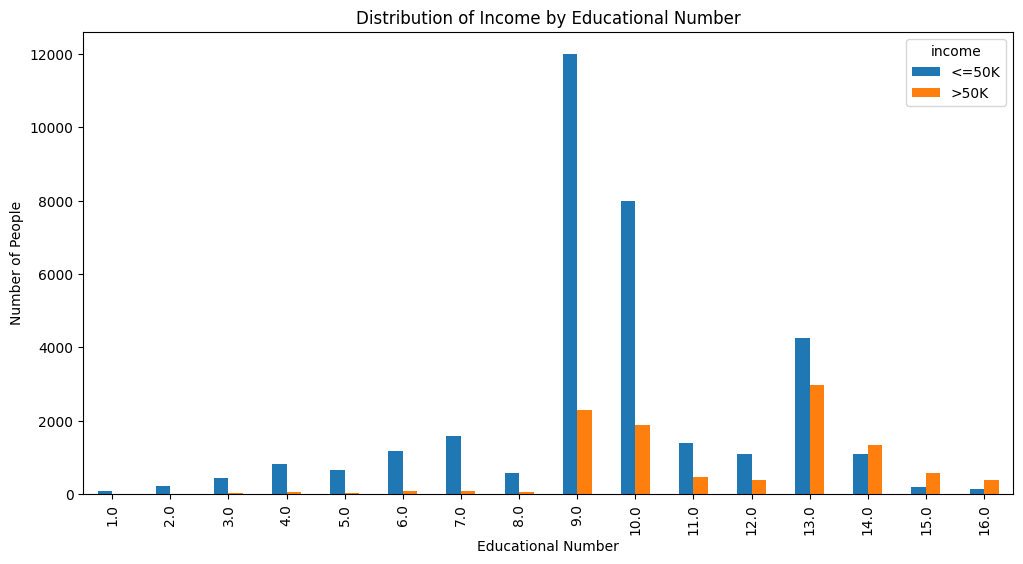

In [228]:
# Plotting the grouped bar chart
grouped_data.plot.bar(figsize=(12, 6))

# Adding labels and title
plt.xlabel("Educational Number")
plt.ylabel("Number of People")
plt.title("Distribution of Income by Educational Number")
plt.show()

**Identifying the Continuous values**

After identifying the continuous values we will visulaize it to get a better insights

In [229]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(f"Continuous feature Count: {len(continuous_feature)}")

Continuous feature Count: 5


In [230]:
continuous_feature

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

**Analysing the continuous values by creating histograms to understand the distribution**

After analyzing the visualizations below, we can say that-

1. The dataset has data of almost all ages from 10 to 90, where most of the data came from age 20 to 50
2. Most of the final waight (fnlwgt) comes from the range of 0.1 to 0.3
3. Most people dont have capital gain and capital loss
4. Most popular pick of hours per week is situated at the range of 35-40 

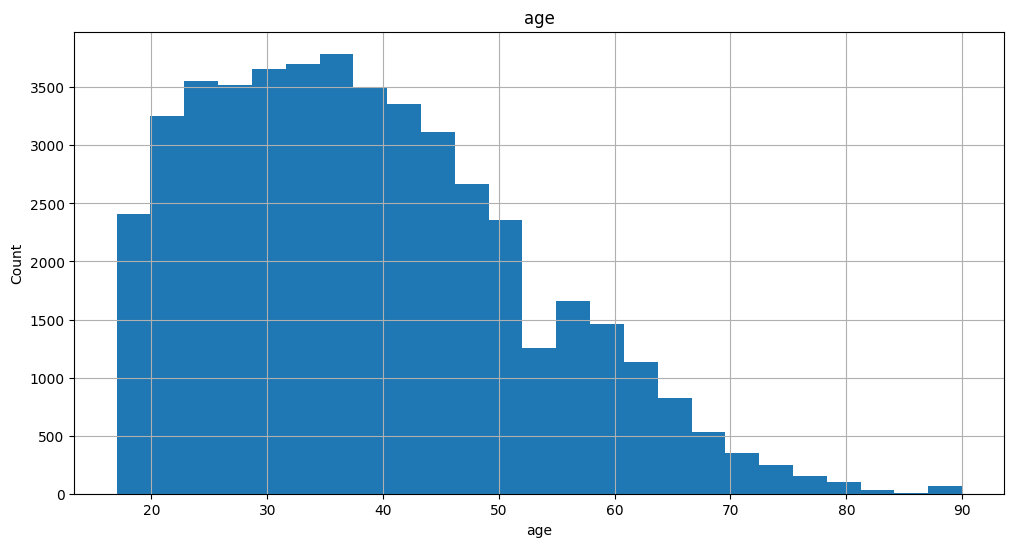

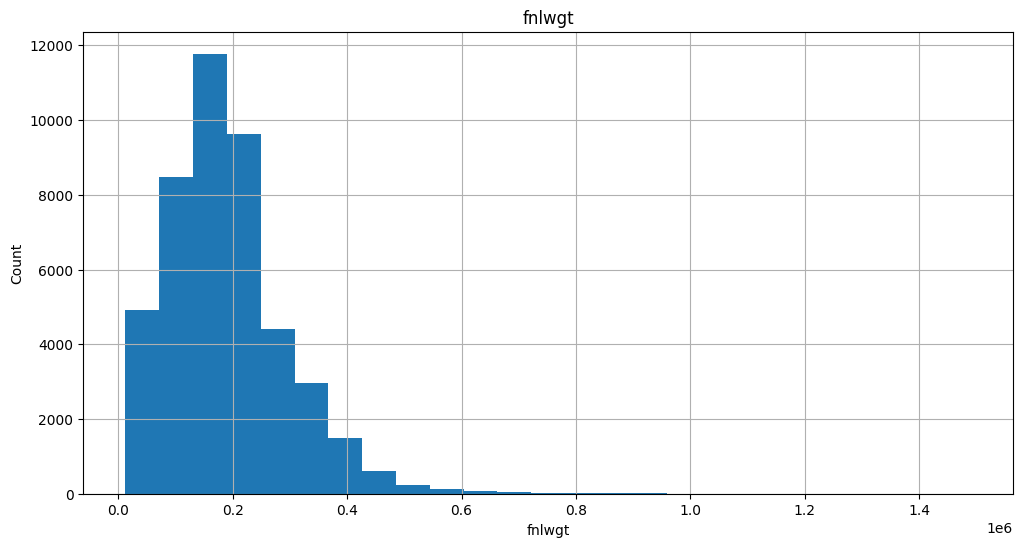

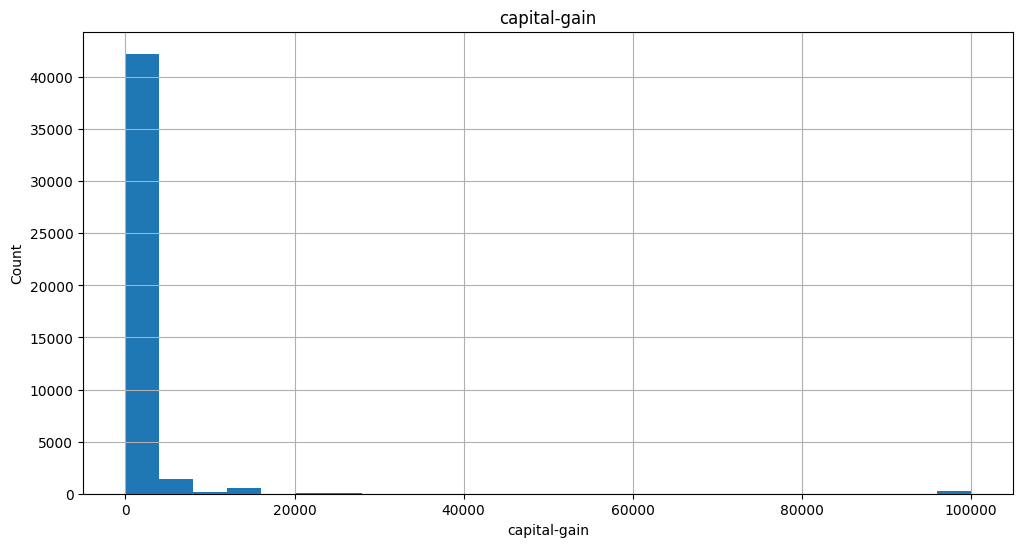

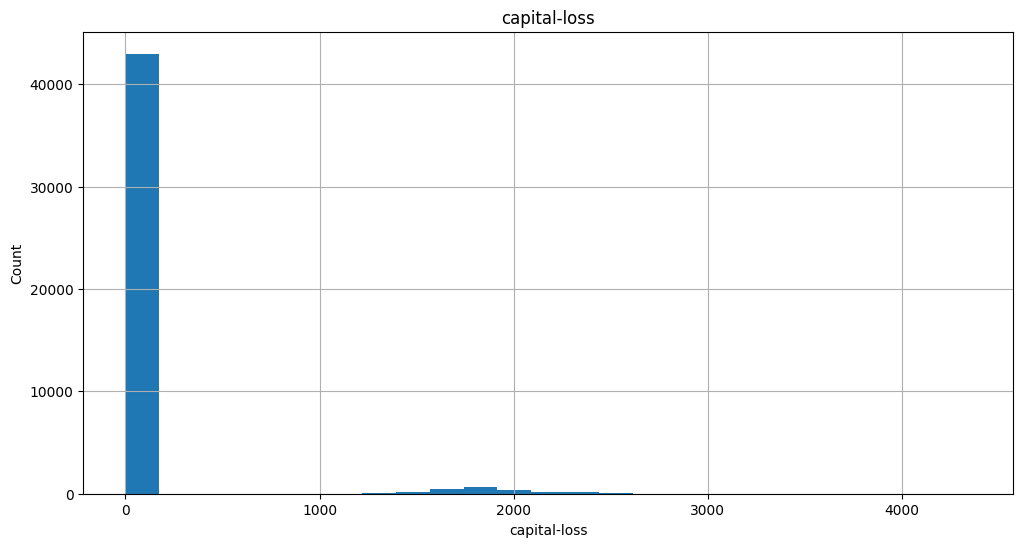

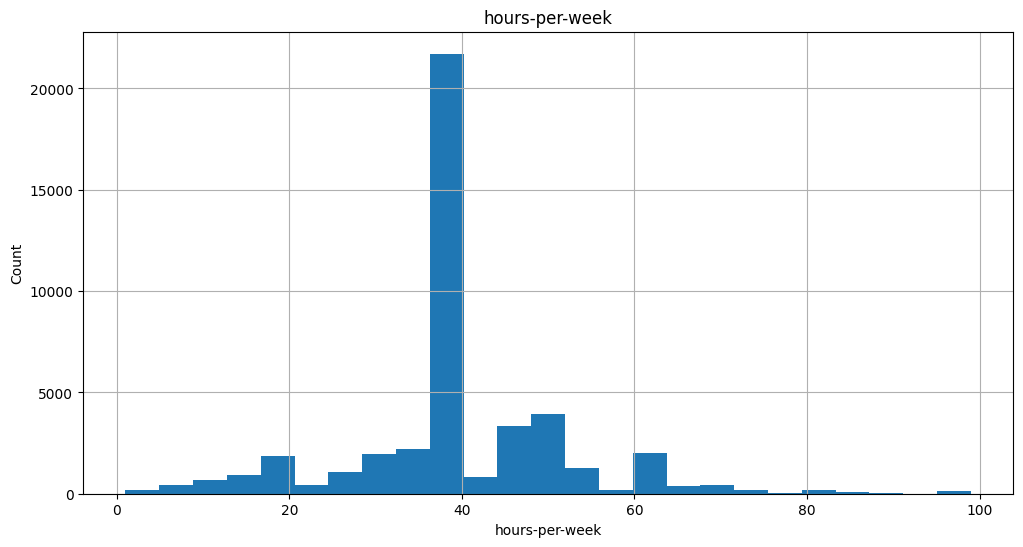

In [231]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25,figsize=(12, 6))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<Axes: >

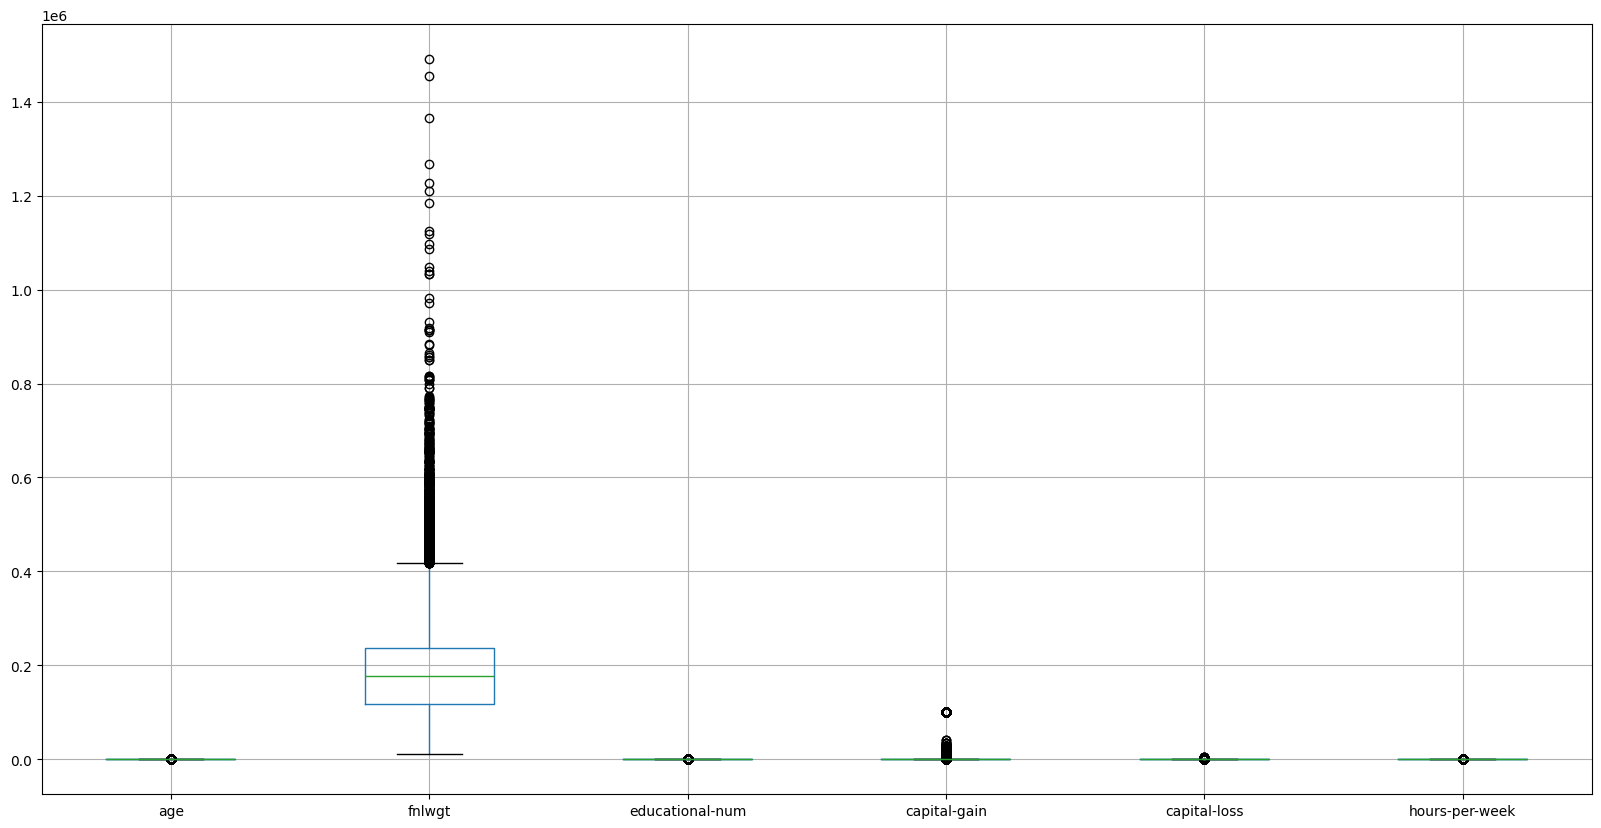

In [232]:
df.boxplot(figsize=(20,10))

In [233]:
# Create log-transformed versions of numeric features
df_log_transformed = df.copy()
for feature in numerical_features:
    df_log_transformed[feature] = np.log1p(df[feature])

df_log_transformed.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.258097,Private,12.331837,11th,2.079442,Never-married,Machine-op-inspct,Own-child,NaN,NaN,0.000000,0.0,3.713572,United-States,<=50K
1,3.663562,Private,11.405507,HS-grad,2.302585,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,3.931826,United-States,<=50K
2,3.367296,Local-gov,12.727696,Assoc-acdm,NaN,Married-civ-spouse,Protective-serv,Husband,White,NaN,0.000000,0.0,3.713572,United-States,>50K
3,3.806662,Private,11.984952,Some-college,2.397895,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,3.713572,United-States,>50K
4,NaN,?,11.547308,NaN,2.397895,Never-married,?,Own-child,White,NaN,0.000000,0.0,3.433987,United-States,<=50K


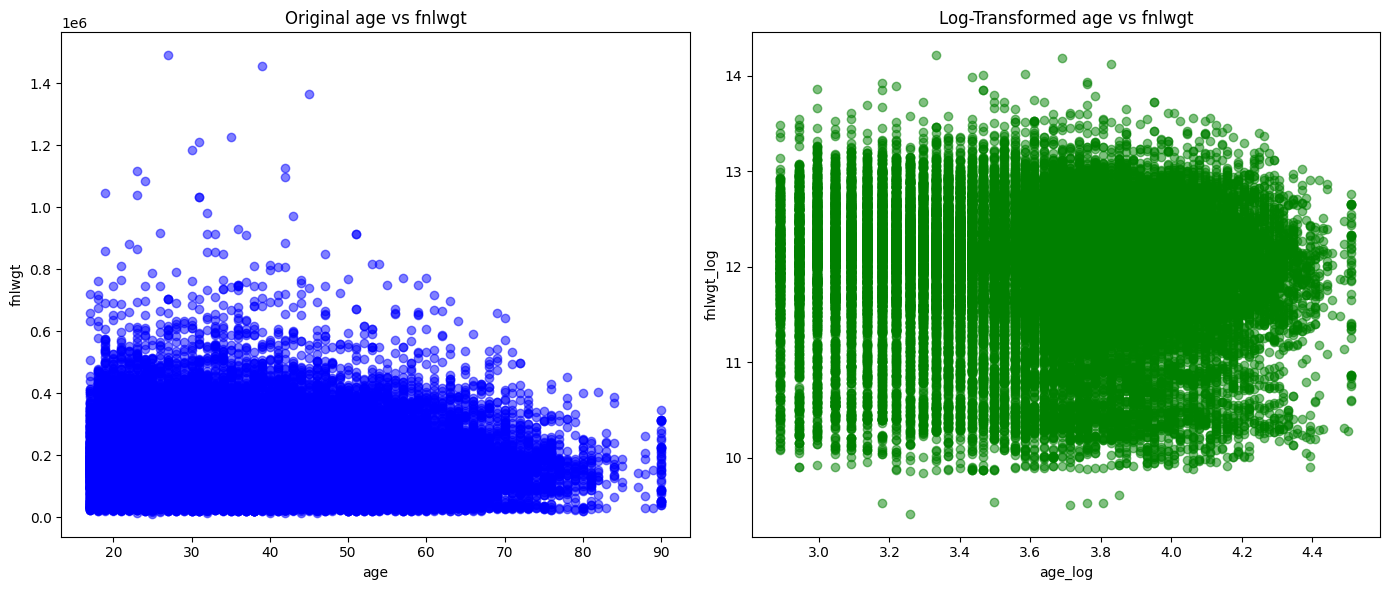

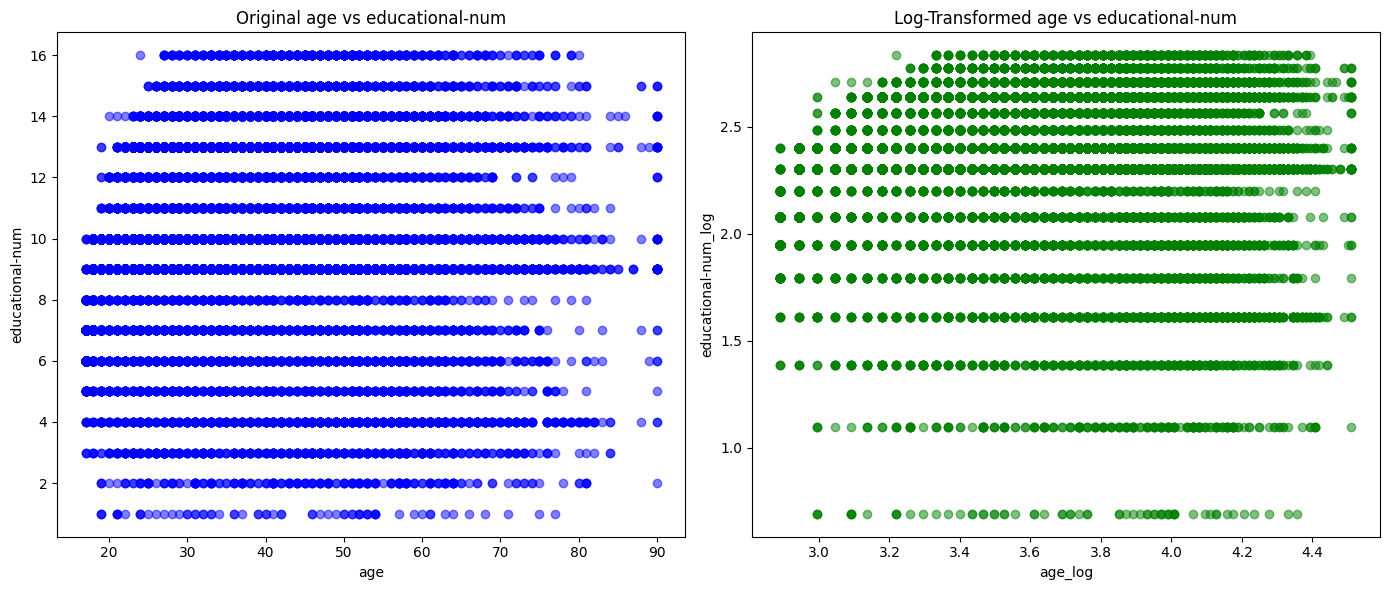

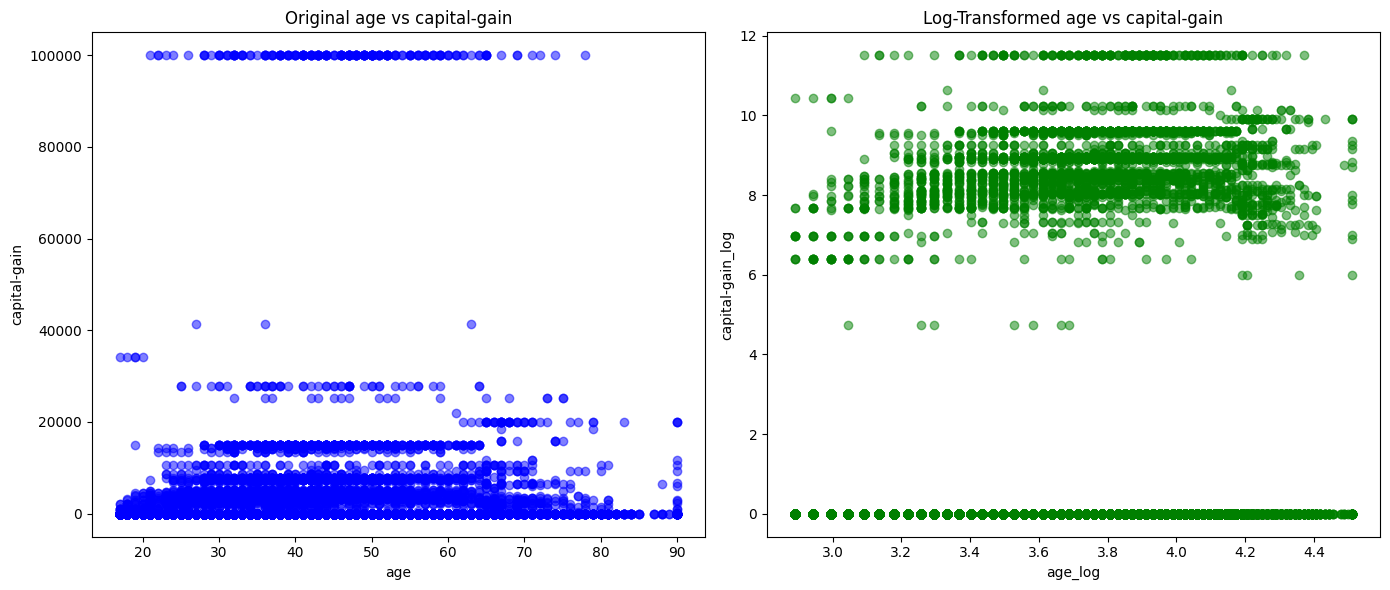

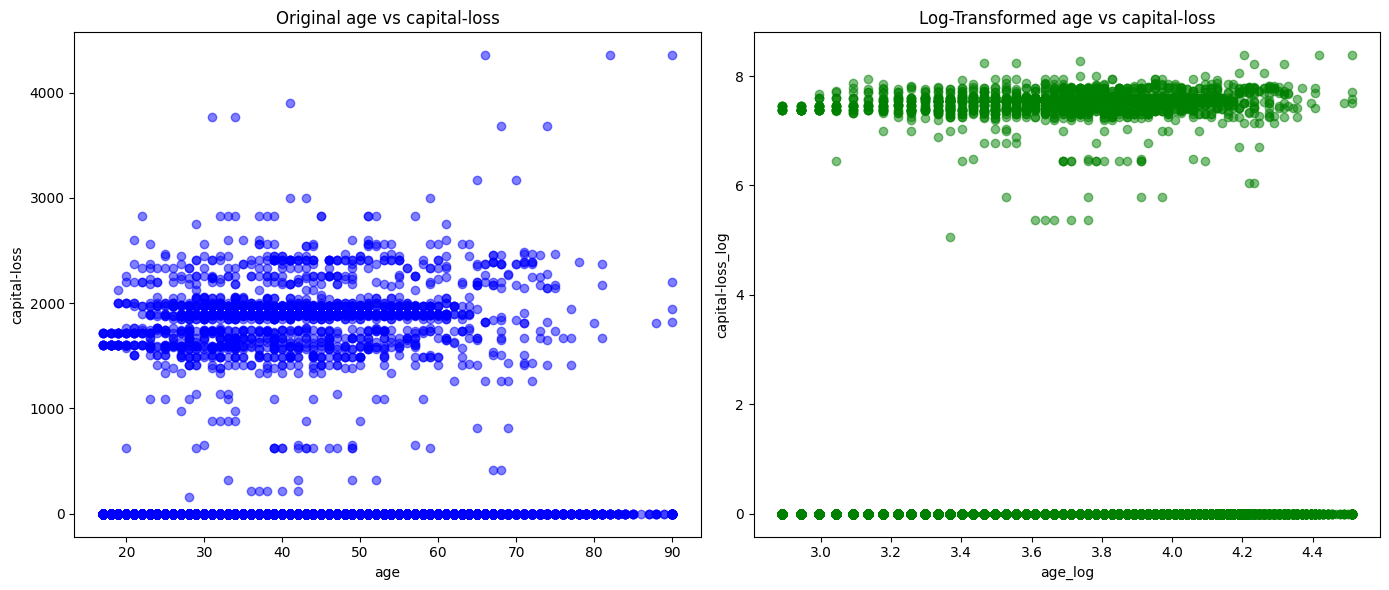

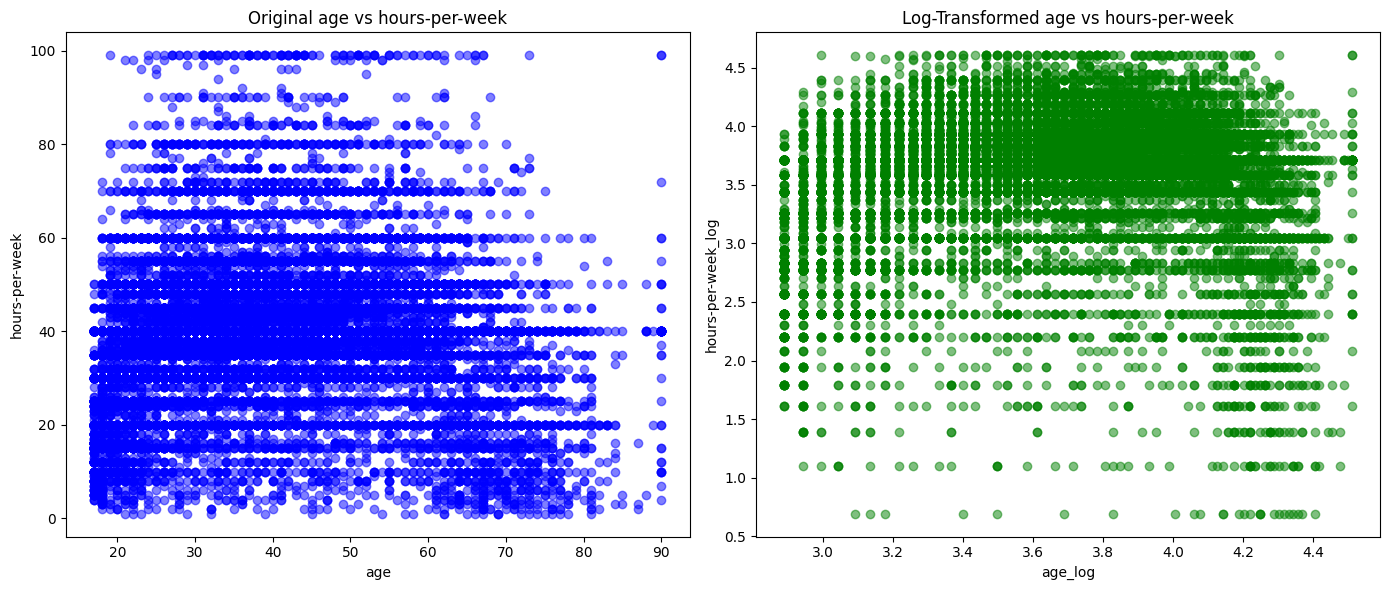

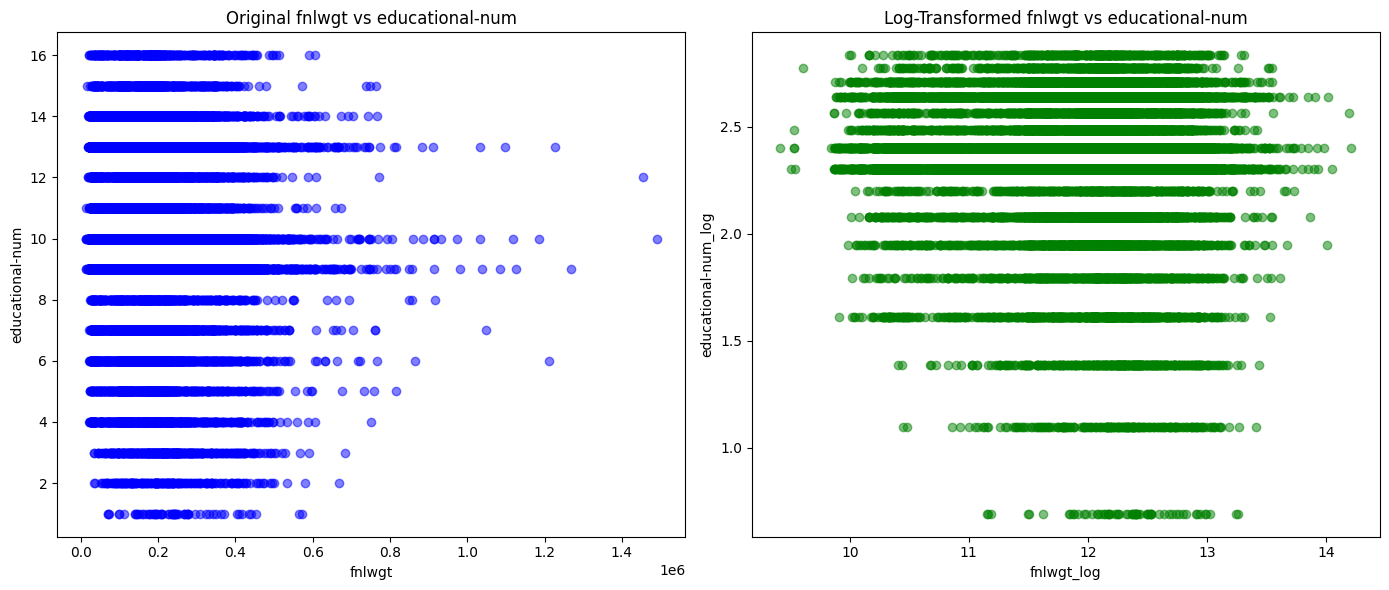

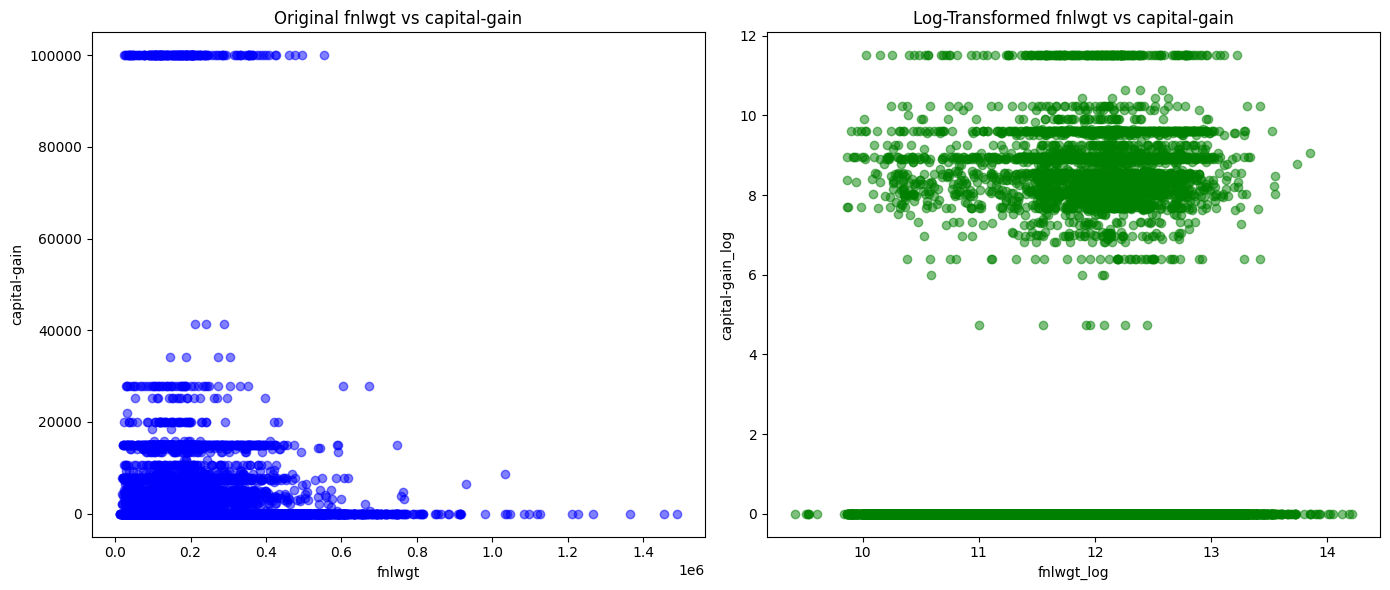

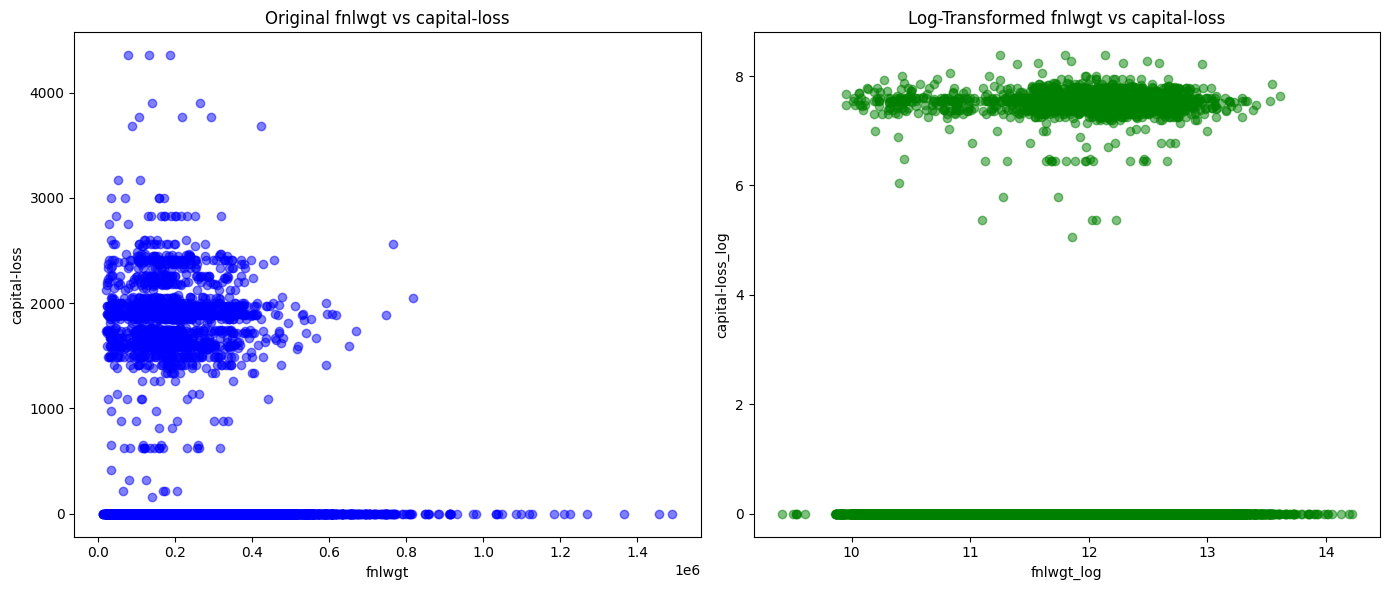

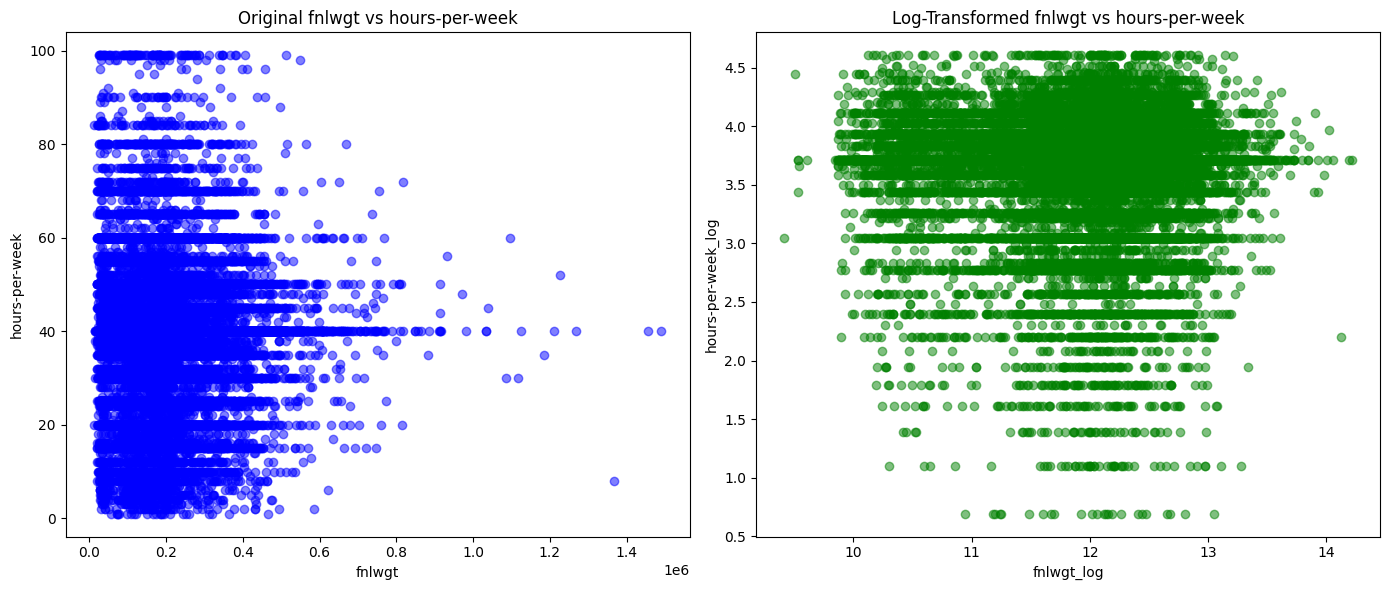

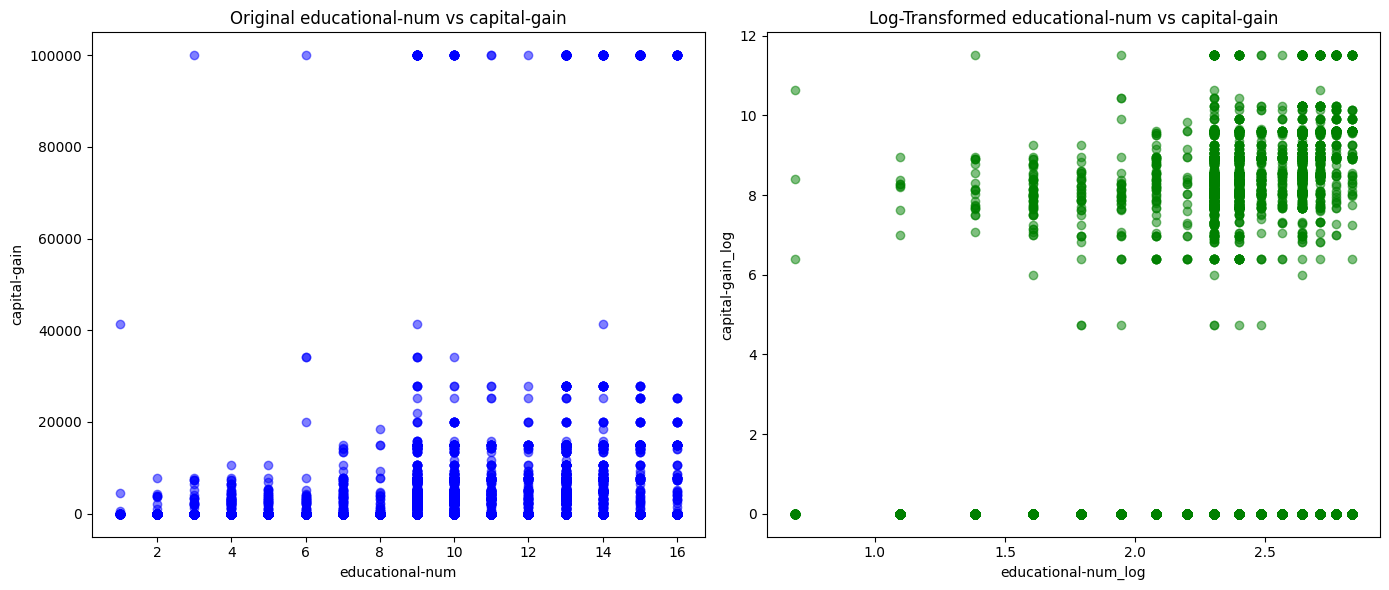

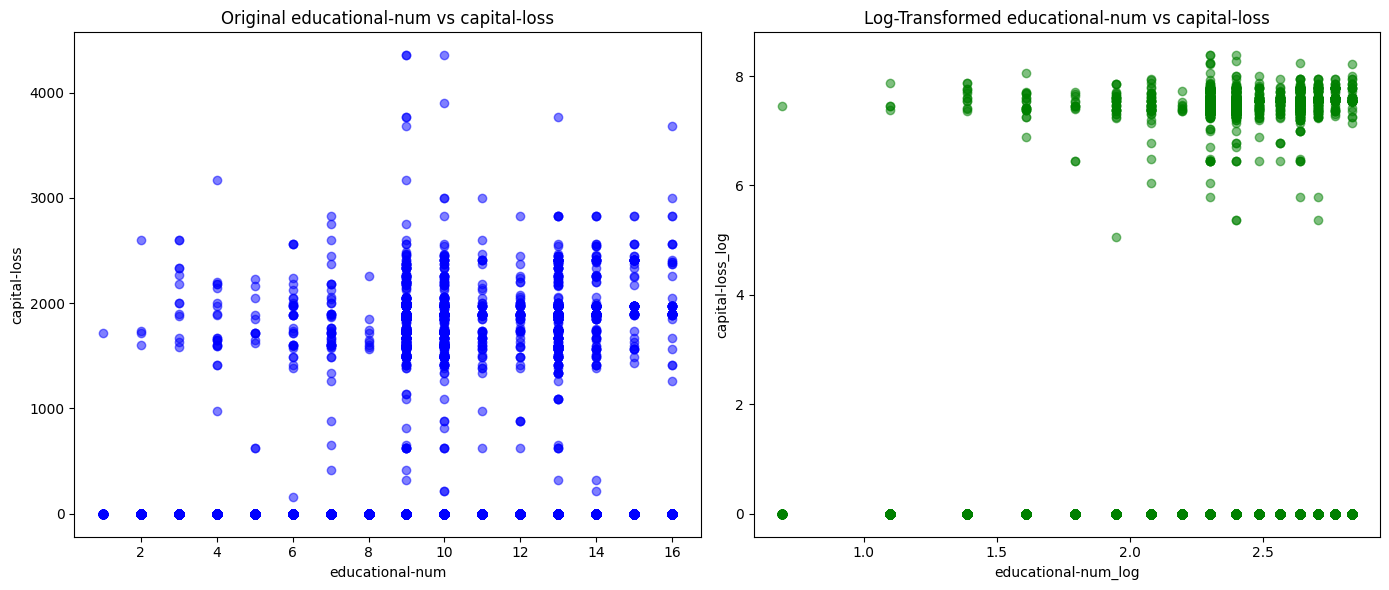

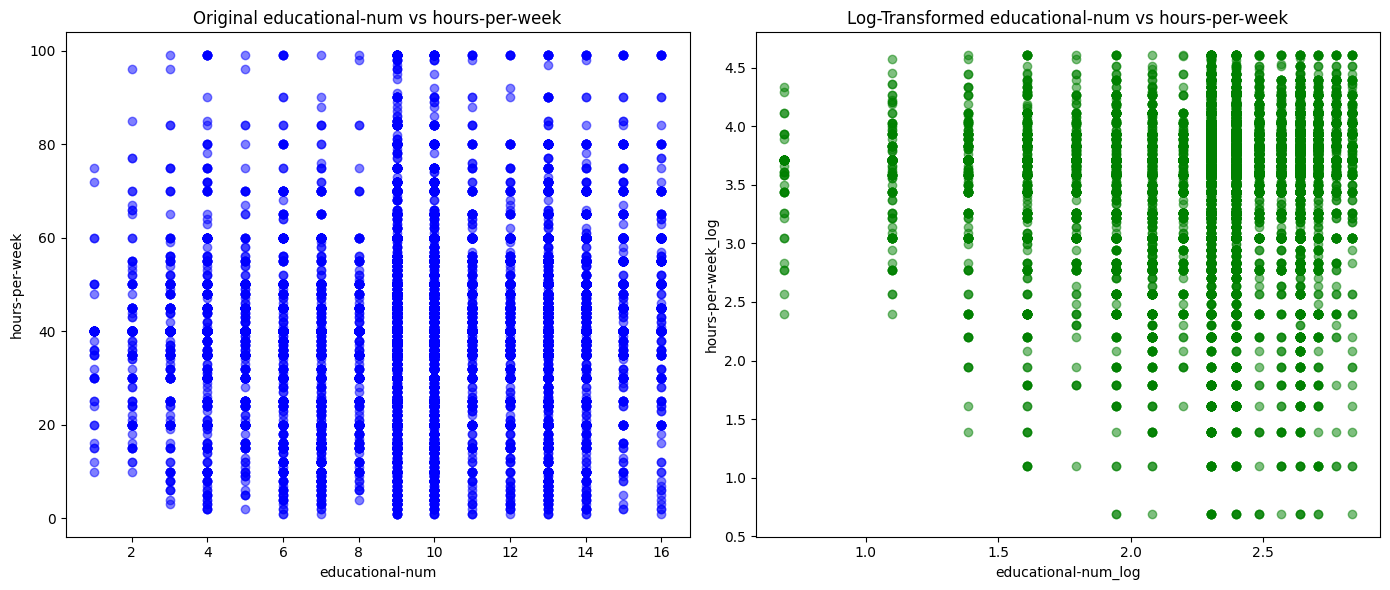

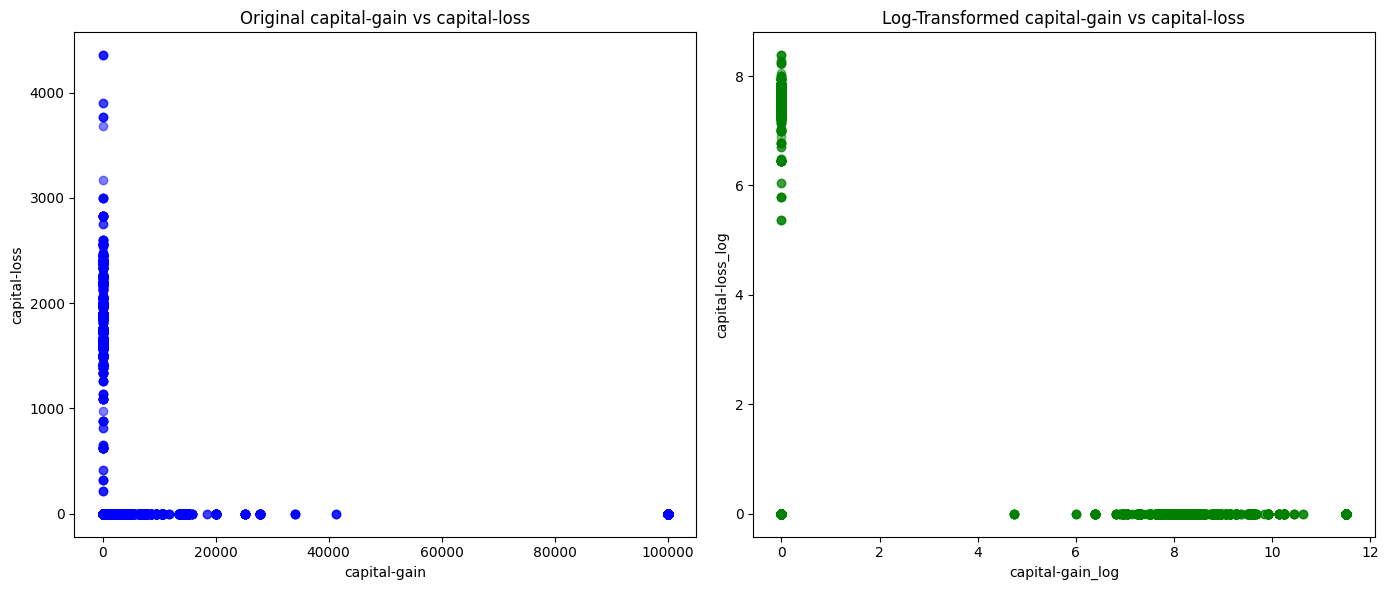

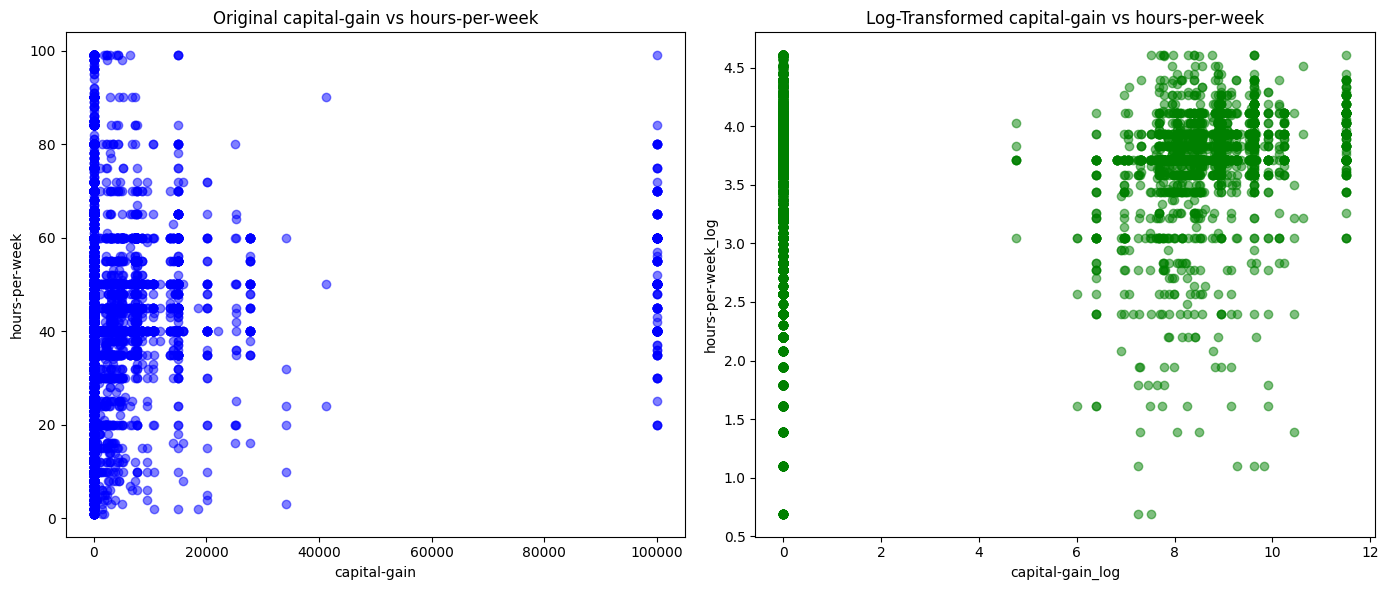

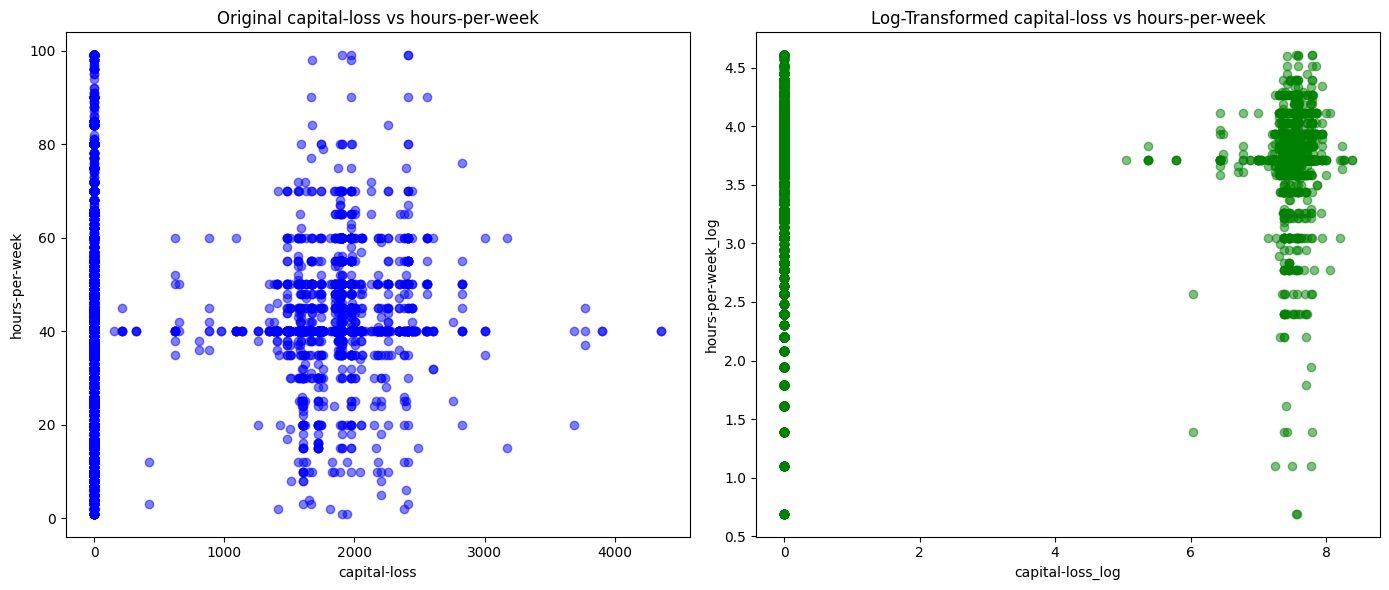

In [234]:

for feature in numerical_features:
    df_log_transformed[feature + '_log'] = np.log1p(df[feature])  # log(x + 1) for transformation

# Generate scatter plots for each numeric feature against another (pairwise)
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature_x = numerical_features[i]
        feature_y = numerical_features[j]

        # Original Scatter Plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(df[feature_x], df[feature_y], alpha=0.5, color='blue')
        plt.title(f'Original {feature_x} vs {feature_y}')
        plt.xlabel(feature_x)
        plt.ylabel(feature_y)

        # Log-Transformed Scatter Plot
        plt.subplot(1, 2, 2)
        plt.scatter(df_log_transformed[feature_x + '_log'], df_log_transformed[feature_y + '_log'], alpha=0.5, color='green')
        plt.title(f'Log-Transformed {feature_x} vs {feature_y}')
        plt.xlabel(f'{feature_x}_log')
        plt.ylabel(f'{feature_y}_log')

        # Show plots side by side
        plt.tight_layout()
        plt.show()

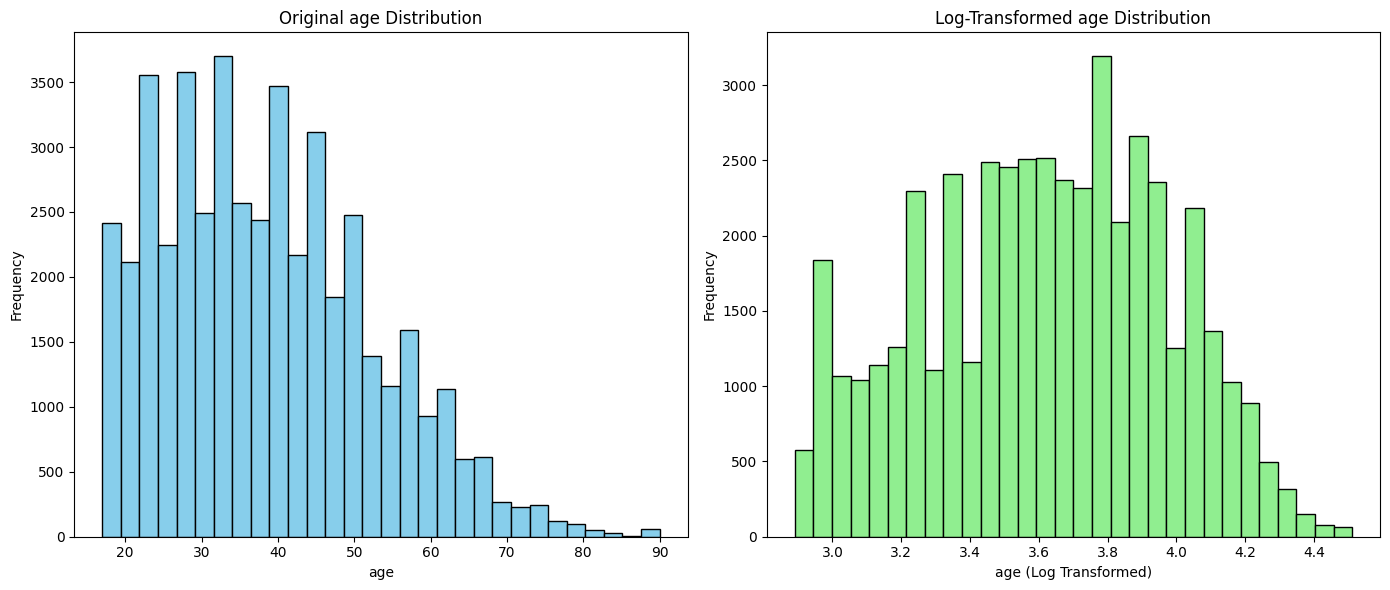

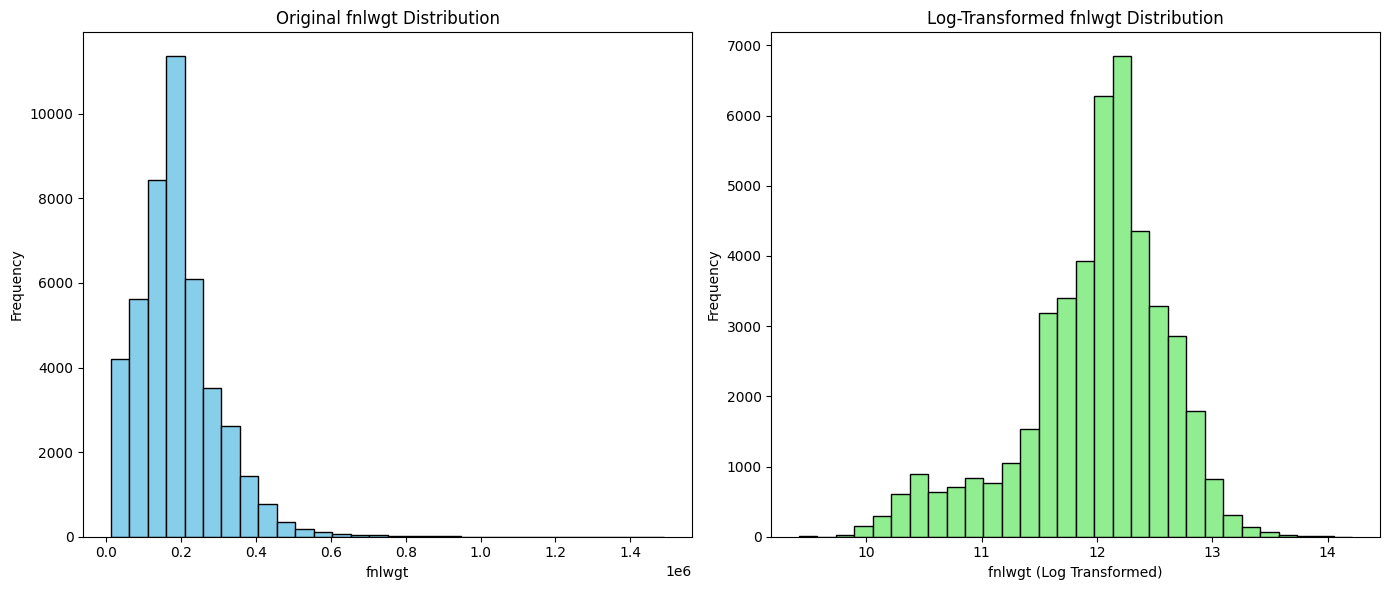

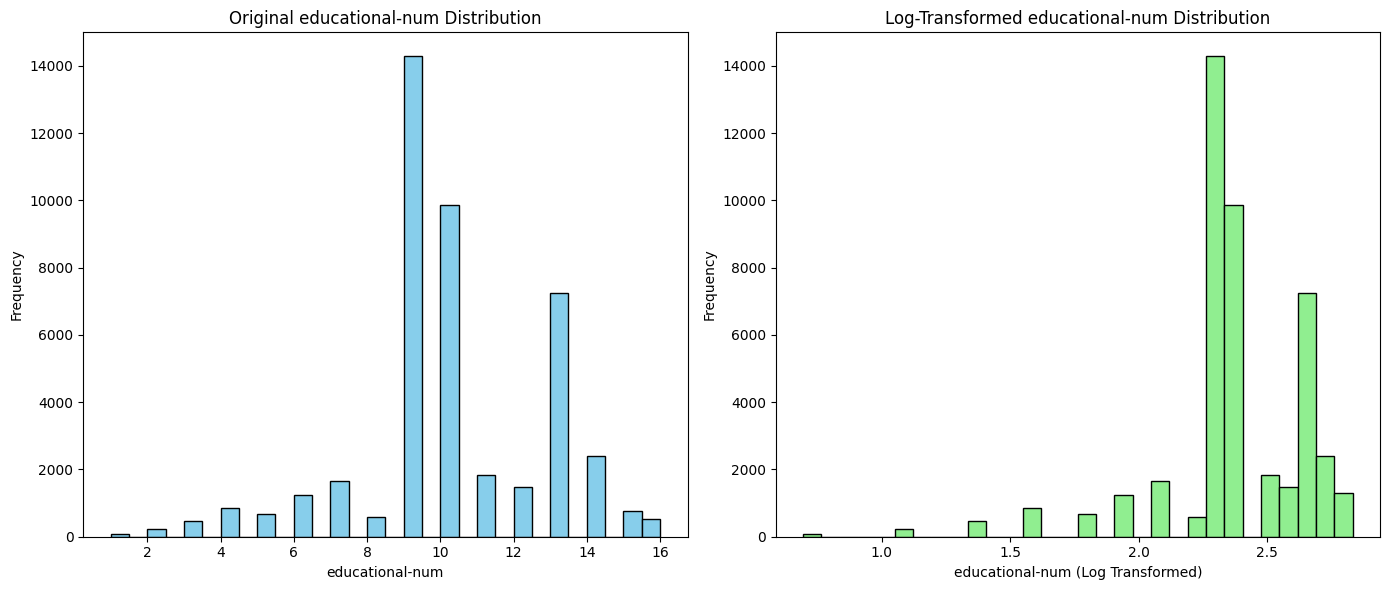

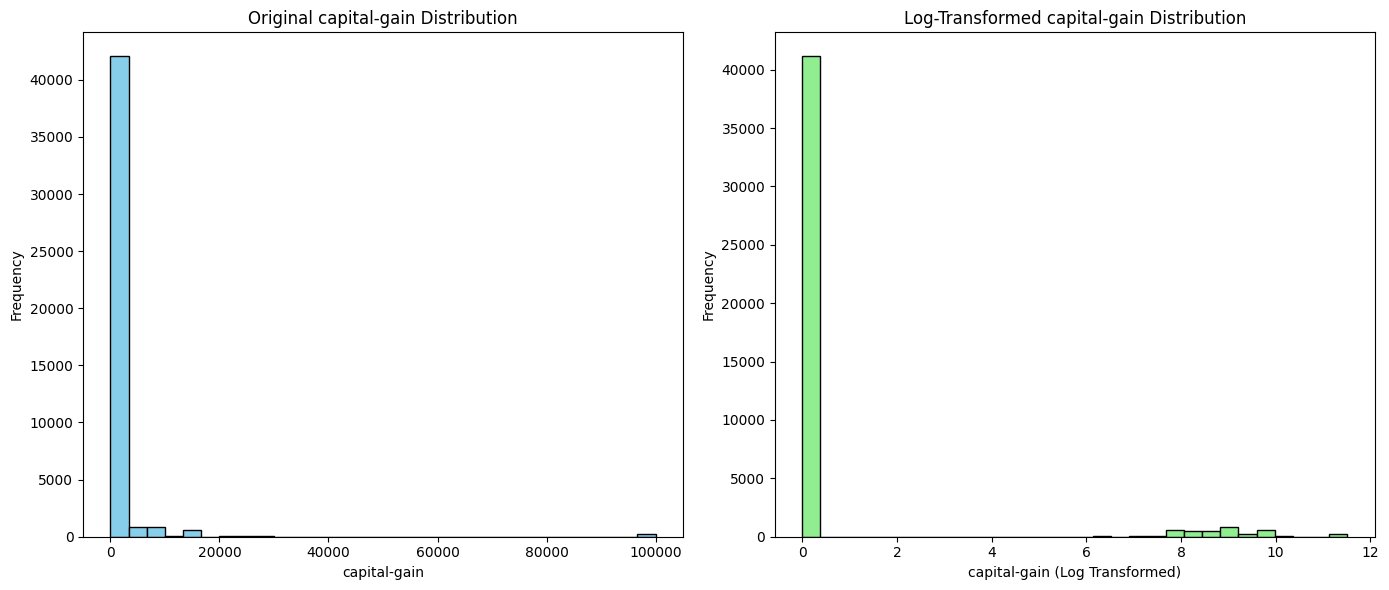

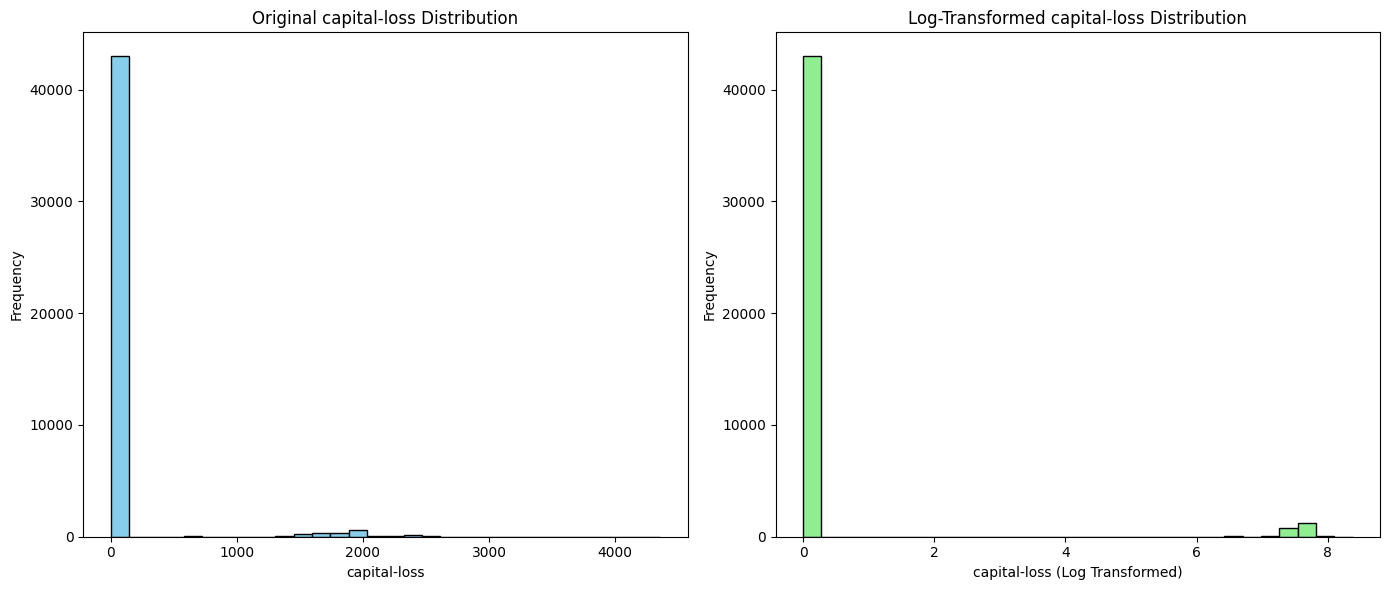

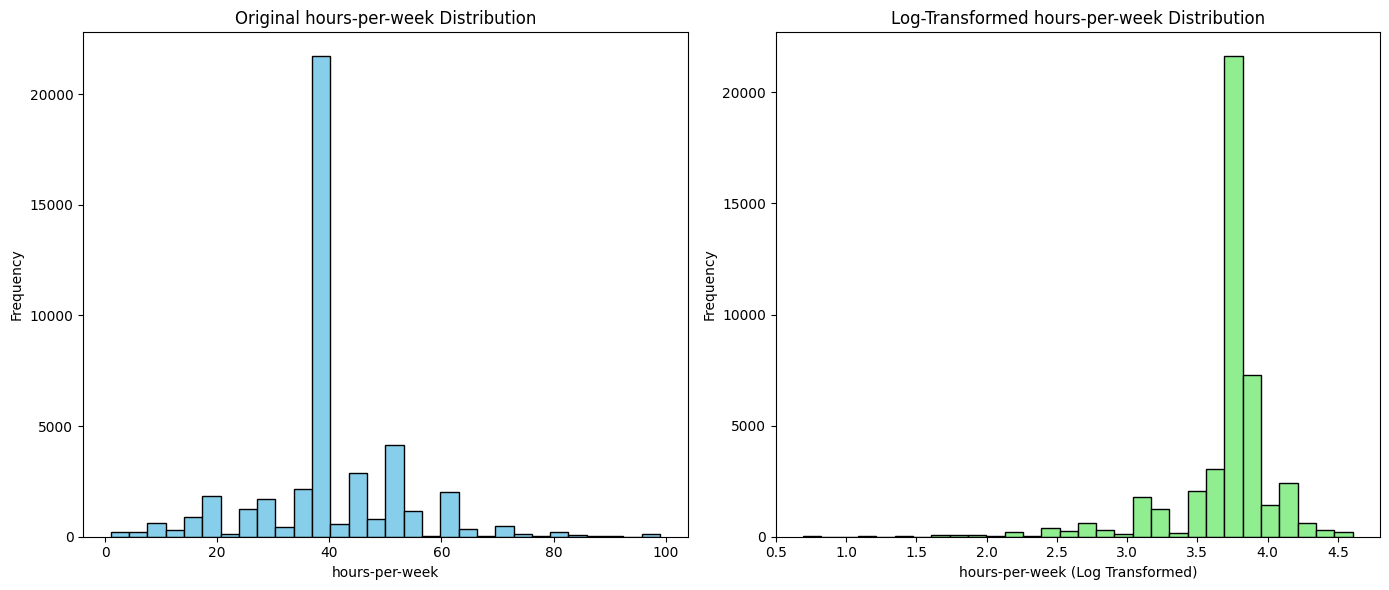

In [235]:
# Iterate through all numerical features
for feature in numerical_features:
    # Skip features that are all NaN
    if df[feature].dropna().shape[0] == 0:
        continue

    # Plot Original and Log-Transformed Distribution Side-by-Side
    plt.figure(figsize=(14, 6))

    # Original Distribution
    plt.subplot(1, 2, 1)
    plt.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Original {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Applying Log Transformation to the features and also using log(x + 1) to handle zero values
    df[feature + '_log'] = np.log1p(df[feature])

    # Log-Transformed Distribution
    plt.subplot(1, 2, 2)
    plt.hist(df[feature + '_log'].dropna(), bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Log-Transformed {feature} Distribution')
    plt.xlabel(f'{feature} (Log Transformed)')
    plt.ylabel('Frequency')

    # Show Plots
    plt.tight_layout()
    plt.show()